In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
file_path='/content/drive/MyDrive/MACHINE LEARNING/suv_data.csv'


In [ ]:
df= pd.read_csv(file_path)
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [ ]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

In [ ]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 0.01),
        np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 0.01)
          )

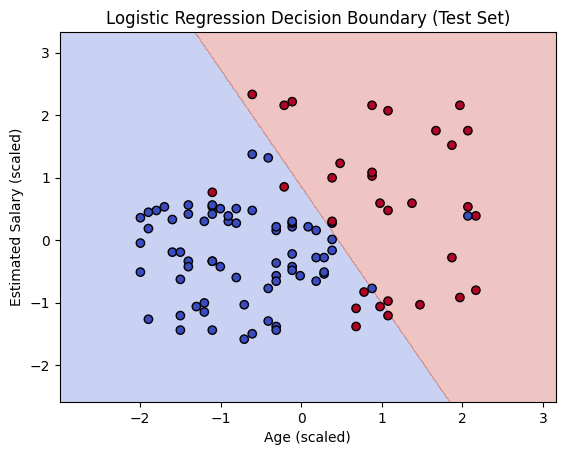

In [ ]:
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.title("Logistic Regression Decision Boundary (Test Set)")
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[65  3]
 [ 8 24]]


In [ ]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Test Accuracy: {test_acc*100:.2f}%")


Training Accuracy: 82.33%
Test Accuracy: 89.00%
